Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%run "Common setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [4]:
wos_config = wosis.load_config('config.yml')

Searching for best practices, plotting keyword and publication trend

In [5]:
best_practice = wosis.keyword_matches(RC, ['best practice', 'good practice', 'best practise', 'good practise', 'an introduction to', 'a framework for', 'guidelines for'], threshold=95.0)

In [6]:
all_bp = best_practice.combine_recs()

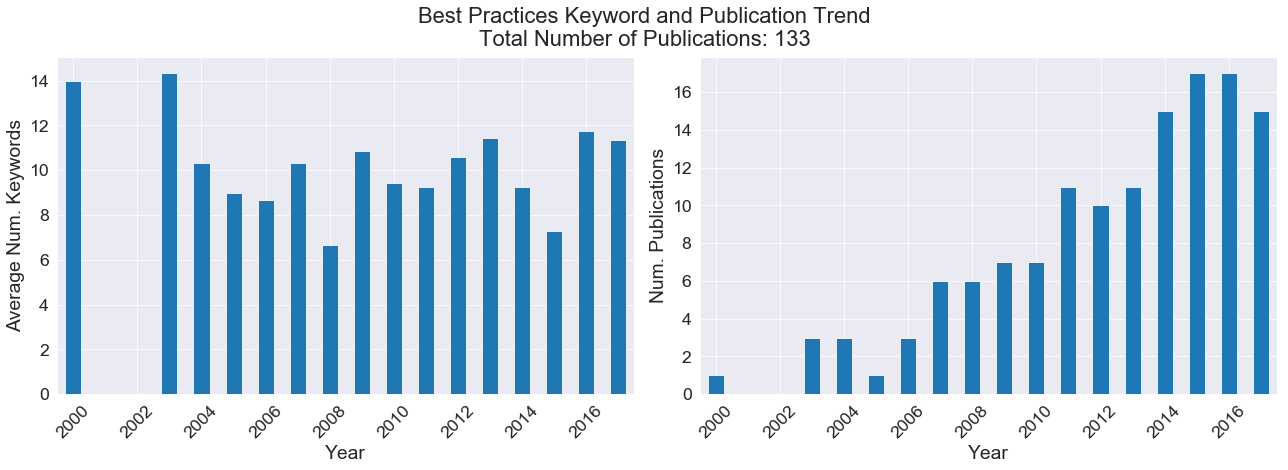

In [17]:
wos_plot.plot_kw_trend(all_bp, title='Best Practices Keyword and Publication Trend', save_plot_fn='figs/bp_kw_trend.png')

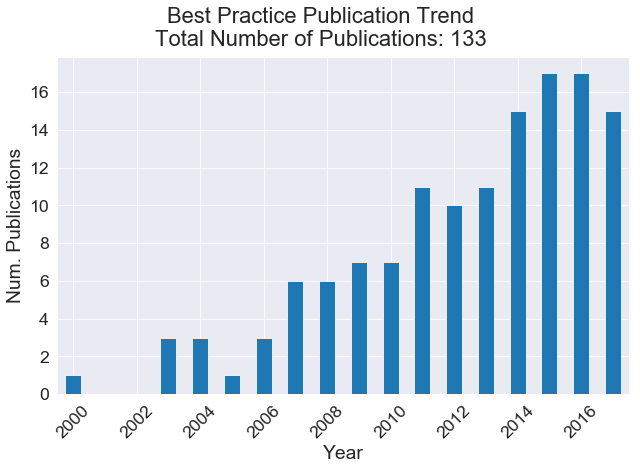

In [8]:
wos_plot.plot_pub_trend(all_bp, title='Best Practice Publication Trend', save_plot_fn='figs/bp_pub_trend.png')

<hr> Running a key-phrase extraction on best practices to identify the fields using this method.

In [9]:
bp_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_bp))

In [10]:
bp_phrases.display_phrases()

An ecological risk assessment for managing and predicting trophic shifts in estuarine ecosystems using a Bayesian network (2016) 
https://dx.doi.org/10.1016/j.envsoft.2016.08.014 

Estuaries are dynamic systems at the transition between freshwater and marine ecosystems. 

The BN provides an environmental risk assessment (ERA) for the probability of a shift to a eutrophied state based on markers of pelagic and benthic primary production. 

The BN was investigated for its potential to predict trophic shifts and provide a framework for evidence-based decision making. 


Uncertainty in the environmental modelling process - A framework and guidance (2007) 
https://dx.doi.org/10.1016/j.envost.2007.02.004 

Instead uncertainty should be seen as a red thread throughout the modelling study starting from the very beginning, where the identification and characterisation of all uncertainty sources should be performed jointly by the modeller, the water manager and the stakeholders. 


Cumulative or

The result is a corrosion profile along the length of the fastener generated by summing the corrosion depths determined at each time step. 

Corrosion profiles are found to exhibit the same general shape independently of climatic load, with the largest amount of corrosion occurring at - mm from the wood surface with corrosion depths ranging from  pm in Phoenix. 


Uncertainty in simulation of nitrate leaching at field and catchment scale within the odense river basin (2008) 
https://dx.doi.org/10.2136/vzj2006.0186 

In this study we present a framework for an uncertainty assessment for model parameters for the unsaturated component in a linked rootzone and groundwater model and exemplified for the Odense River catchment. 

The ranking nitrate leaching derived from the LHS simulations for a -yr period is preserved for longer -yr simulations. 

This implies that the proposed framework is applicable to the Odense catchment and likely has general applicability. 


A framework for the quant

Assessment of Interindividual and Geographic Variability in Human Exposure to Fine Particulate Matter in Environmental Tobacco Smoke (2011) 
https://dx.doi.org/10.1111/j.1539-6924.2010.01523.x 

exposure for a specified population based on ambient concentrations and indoor emissions sources. 

Environmental tobacco smoke (ETS) is a major contributor to indoor human exposures to fine particulate matter of . 

mu m or smaller (PM.). 

Interindividual variability for ETS exposure was quantified. 

Recommendations are made regarding updating of input data and algorithms related to ETS exposure in the SHEDS-PM model. 


Best practices for conceptual modelling in environmental planning and management (2016) 
https://dx.doi.org/10.1016/j.envsoft.2016.02.023 

Due to their sometimes apparent simplicity, development and use of a conceptual model is often an attractive option when tackling an environmental problem situation. 


Dynamic parameter sensitivity in numerical modelling of cyclone-indu

The sensitivity of the water depth/level and that of the longitudinal unit discharge are shown to contain redundant information. 

This paper presents the analytical properties of the solutions of the sensitivity equations for steady-state, two-dimensional shallow water flow. 

Moreover, the sensitivity for all three variables extends farther in the transverse direction than in the longitudinal direction, the anisotropy ratio being a function of the sole Froude number. 

For supercritical flow, the sensitivity obeys an anisotropic hyperbolic equation. 

Under subcritical conditions, the sensitivities of the flow variables are shown to obey an anisotropic elliptic equation. 


Uncertainty analysis and evaluation of a complex, multi-specific weed dynamics model with diverse and incomplete data sets (2016) 
https://dx.doi.org/10.1016/j.envsoft.2016.09.020 

FLORSYS satisfactorily predicted weed seed bank, plant densities and crop yields, at daily and multi-annual scales, at well monitored

This paper examines the different sources of uncertainty involved in housing stock models and proposes a framework for handling these uncertainties. 

Housing stock models can be useful tools in helping to assess the environmental and socio-economic impacts of retrofits to residential buildings; however, existing housing stock models are not able to quantify the uncertainties that arise in the modelling process from various sources, thus limiting the role that they can play in helping decision makers. 

The proposed framework is tested on a case study building, and suggestions are made on how to expand the framework for retrofit analysis at an urban-scale. 


Stochastic sensitivity analysis of nitrogen pollution to climate change in a river basin with complex pollution sources (2017) 
https://dx.doi.org/10.1007/s11356-017-0257-y 

Few studies have assessed the impacts of climate change on the water quality of river basins with complex point and non-point pollution sources. 

In view of

The effects of extreme,nondesign loads on highly optimized control strategies have not previously been explored, and it is found in this example that options yielding the greatest improvements under design conditions typically provide poor effluent quality robustness and resilience to influent perturbations. 


Quantitative risk assessment of CO2 transport by pipelines-A review of uncertainties and their impacts (2010) 
https://dx.doi.org/10.1016/j.jhazmat.2009.11.068 

A systematic assessment, based on an extensive literature review, of the impact of gaps and uncertainties on the results of quantitative risk assessments (QRAs) for CO pipelines is presented. 

It is concluded that QRA for CO pipelines can be improved by validation of release and dispersion models for high-pressure CO releases, definition and adoption of a universal dose-effect relationship and development of a good practice guide for QRAs for CO pipelines. 

In existing studies this range is found to be between < m and

https://dx.doi.org/10.1016/j.envsoft.2013.10.017 

Also, a list of influential parameters was identified. 

The study rationale consisted in a comprehensive evaluation of the model and the formulation of guidelines for model simplification and efficient calibration. 

This study includes a global sensitivity analysis of the water productivity model AquaCrop. 

The main objectives were to distinguish the model's influential and non-influential parameters, and to examine the yield output sensitivity. 

Making these parameters fixed would be a step towards model simplification. 


Enhancing adaptive sparse grid approximations and improving refinement strategies using adjoint-based a posteriori error estimates (2015) 
https://dx.doi.org/10.1016/j.jcp.2014.09.014 

We use adjoint-based a posteriori error estimates of the physical discretization error and the interpolation error in the sparse grid to enhance the sparse grid approximation and to drive adaptivity of the sparse grid. 

In this 

Addressing the influence of each of them on the final result and providing a ranking procedure may be useful for risk management purposes. 




<hr> Top-cited journals for best practice

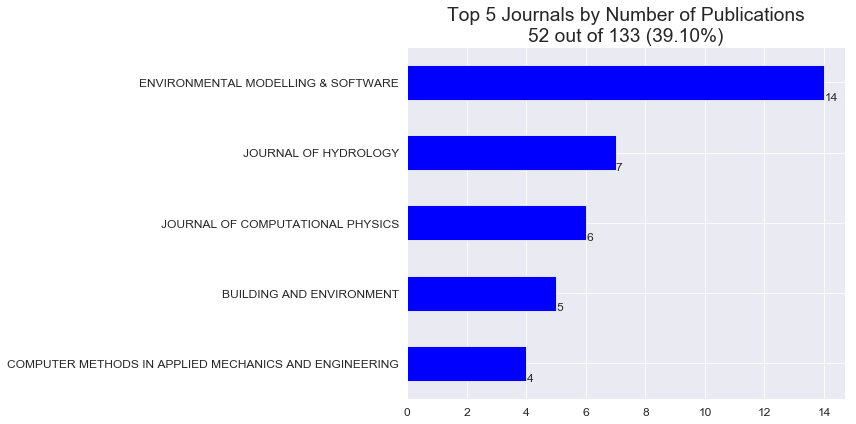

In [11]:
wos_plot.plot_pubs_per_journal(all_bp, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/bp_journal_pubs.png')

In [12]:
journals_of_interest_bp = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Journal of Computational Physics'.upper(), 'Building and Environment'.upper(), 'Computer Methods in Applied Mechanics and Engineering'.upper()]
pubs_for_journals_bp = wosis.find_pubs_by_journal(all_bp, journals_of_interest_bp)

In [13]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_bp = {}
for pubs in pubs_for_journals_bp:
    paper_citations_per_journal_bp[pubs] = wosis.get_num_citations(pubs_for_journals_bp[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 8C36FfhvwFkbHNfmcaS)



Authenticated (SID: 5FaGLyyM1gTTHwO8ydq)


FileNotFoundError: [Errno 2] No such file or directory: "tmp/{'best practice'} {'good practice'} {'best practise'} {'good practise'} {'an introduction to'} {'a framework for'} {'guidelines for'}_COMPUTER METHODS IN APPLIED MECHANICS AND ENGINEERING_citations.csv"

In [ ]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_bp = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_bp.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_bp = collection_bp.append(df[cols_of_interest][0:10], ignore_index=True)

In [ ]:
top_cited_in_top_journals_bp = collection_bp.sort_values('citations', ascending=False)
top_cited_in_top_journals_bp.head(10)

In [ ]:
top_cited_in_top_journals_bp.to_csv('../data/top_cited_bp_papers.csv')

<hr> Topic trend

In [14]:
all_bp.name = 'Best Practices'

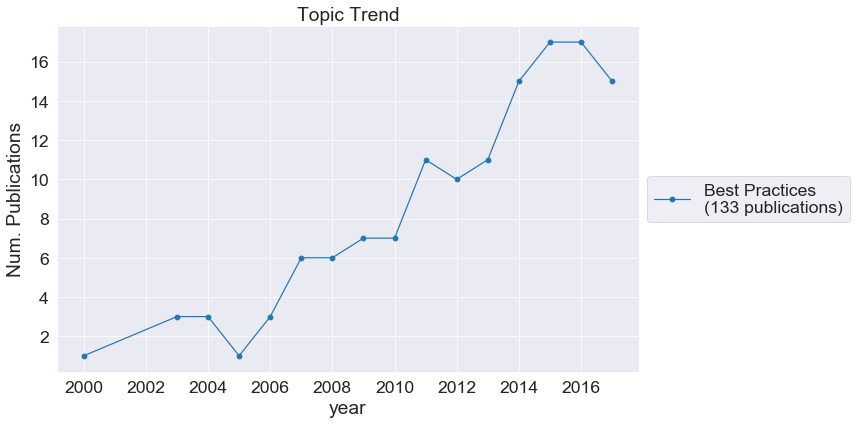

In [15]:
wos_plot.plot_topic_trend([all_bp], save_plot_fn='figs/bp_topic_trend.png')

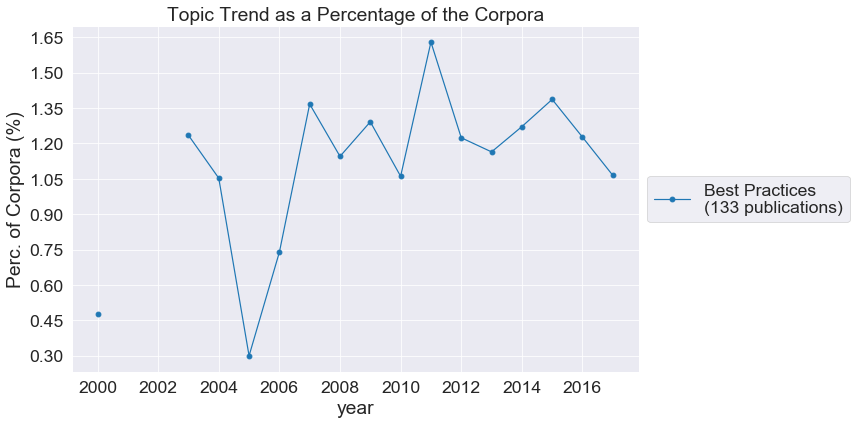

In [16]:
wos_plot.plot_topic_trend([all_bp], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', save_plot_fn='figs/bp_topic_trend_percentage.png')